# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
#Seu código de importação aqui
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA02.csv", delimiter=',')
df.head(10)

,customerID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Servico_StreamingTV,Tipo_Contrato,Forma_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No
4,8191-XWSZG,Female,0,No,No,52,Yes,No,No internet service,No internet service,No internet service,One year,Mailed check,71.45,1022.95,No
5,9959-WOFKT,Male,0,No,Yes,71,Yes,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),71.45,7382.25,No
6,4190-MFLUW,Female,0,Yes,Yes,10,Yes,DSL,No,Yes,No,Month-to-month,Credit card (automatic),71.45,528.35,Yes
7,4183-MYFRB,Female,0,No,No,21,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,71.45,1862.90,No
8,8779-QRDMV,Male,1,No,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,71.45,39.65,Yes
9,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),71.45,202.25,No


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [3]:
#Seu código aqui
# a
df.describe()
# b
# por enquanto tudo ok, o valor min de tempo como cliente chama atenção ser 0, mas acaba sendo possível já que está em meses

,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,66.342564,2290.087178
std,0.368135,24.636885,28.051718,2264.585643
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,8.000000,45.400000,402.337500
50%,0.000000,29.000000,71.450000,1402.900000
75%,0.000000,56.000000,87.712500,3867.162500
max,1.000000,72.000000,118.650000,8564.750000


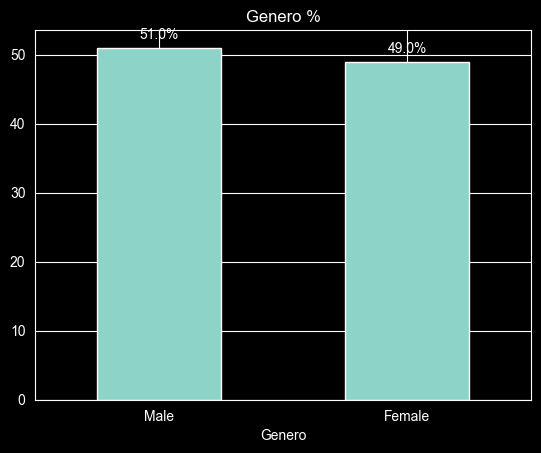

In [4]:
# c
contagem_genero = df['Genero'].value_counts()
porcentagem_genero = (contagem_genero / contagem_genero.sum()) * 100

ax = porcentagem_genero.plot(kind='bar', title='Genero %')
plt.xlabel('Genero')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext=(0, 9),
                textcoords = 'offset points')


Distribuição similar entre gêneros.

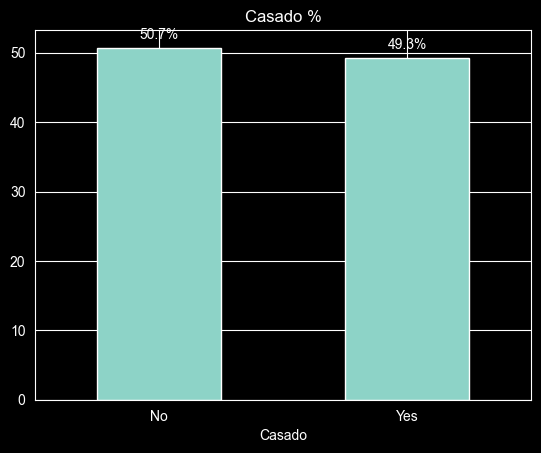

In [5]:
# c
contagem_casado = df['Casado'].value_counts()
porcentagem_casado = (contagem_casado / contagem_casado.sum()) * 100

ax = porcentagem_casado.plot(kind='bar', title='Casado %')
plt.xlabel('Casado')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext=(0, 9),
                textcoords = 'offset points')
plt.show()


A distribuição de casados e solteiros é similar.

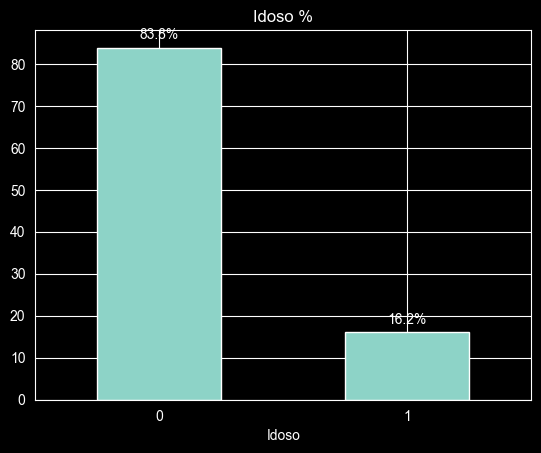

In [6]:
# c
contagem_idoso = df['Idoso'].value_counts()
porcentagem_idoso = (contagem_idoso / contagem_idoso.sum()) * 100

ax = porcentagem_idoso.plot(kind='bar', title='Idoso %')
plt.xlabel('Idoso')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext=(0, 9),
                textcoords = 'offset points')
plt.show()


Não temos idade, mas temos se é idoso ou não, 16.2% é, o que indica que essa % dos clientes tem 60 anos ou mais.

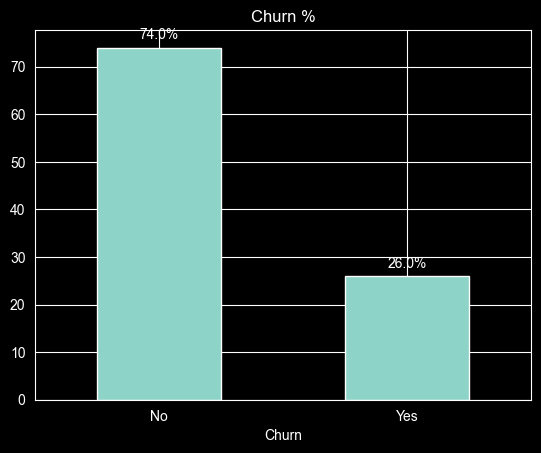

In [7]:
# c
contagem_churn = df['Churn'].value_counts()
porcentagem_churn = (contagem_churn / contagem_churn.sum()) * 100

ax = porcentagem_churn.plot(kind='bar', title='Churn %')
plt.xlabel('Churn')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext=(0, 9),
                textcoords = 'offset points')
plt.show()


Quase 26% com marcador de churn, certa semelhança com idade.

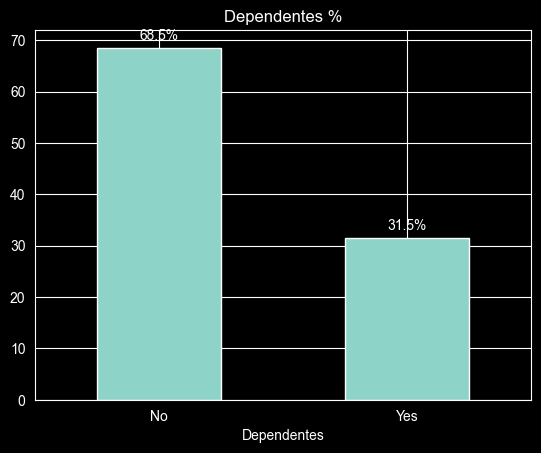

In [8]:
# c
contagem_dependentes = df['Dependentes'].value_counts()
porcentagem_dependentes = (contagem_dependentes / contagem_dependentes.sum()) * 100

ax = porcentagem_dependentes.plot(kind='bar', title='Dependentes %')
plt.xlabel('Dependentes')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext=(0, 9),
                textcoords = 'offset points')
plt.show()


31.5% possuem dependentes, pode ter uma relação com os idosos.

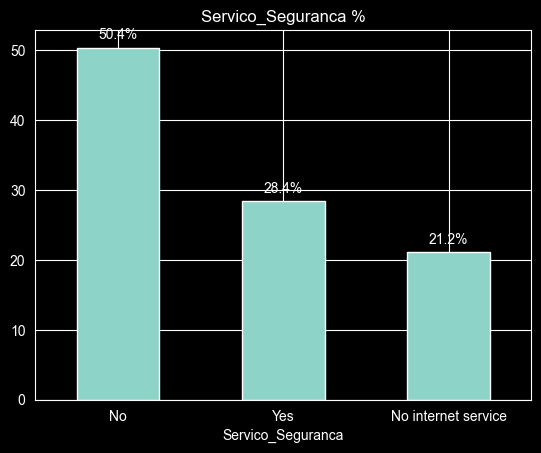

In [9]:
# c
contagem_serv_seguranca = df['Servico_Seguranca'].value_counts()
porcentagem_serv_seguranca = (contagem_serv_seguranca / contagem_serv_seguranca.sum()) * 100

ax = porcentagem_serv_seguranca.plot(kind='bar', title='Servico_Seguranca %')
plt.xlabel('Servico_Seguranca')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext=(0, 9),
                textcoords = 'offset points')
plt.show()


Vamos relacionar melhor depois, mas pode ser que idosos sejam os que tem serviços de segurança, o que faria sentido.

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


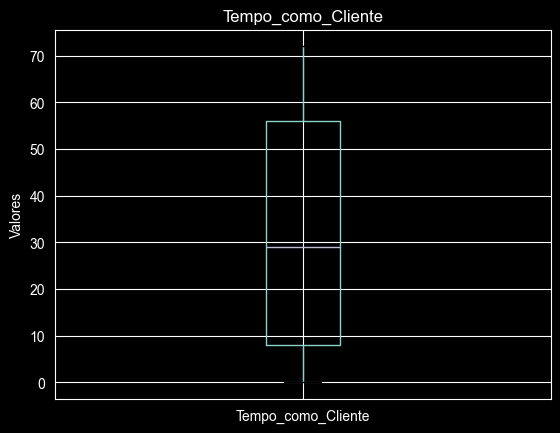

In [10]:
#Seu código aqui
df.boxplot(column='Tempo_como_Cliente')
plt.title('Tempo_como_Cliente')
plt.ylabel('Valores')
plt.show()

Conferindo, chamou atenção anteriormente mas parece ok.

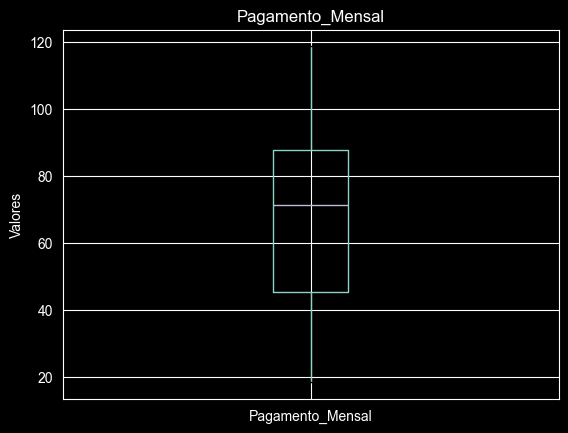

In [11]:
#Seu código aqui
df.boxplot(column='Pagamento_Mensal')
plt.title('Pagamento_Mensal')
plt.ylabel('Valores')
plt.show()

Ok também.

Acredito que os outliers já foram retirados anteriormente, então está tudo ok com o db.

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

In [12]:
#Seu código aqui
df.head(10)

,customerID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Servico_StreamingTV,Tipo_Contrato,Forma_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No
4,8191-XWSZG,Female,0,No,No,52,Yes,No,No internet service,No internet service,No internet service,One year,Mailed check,71.45,1022.95,No
5,9959-WOFKT,Male,0,No,Yes,71,Yes,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),71.45,7382.25,No
6,4190-MFLUW,Female,0,Yes,Yes,10,Yes,DSL,No,Yes,No,Month-to-month,Credit card (automatic),71.45,528.35,Yes
7,4183-MYFRB,Female,0,No,No,21,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,71.45,1862.90,No
8,8779-QRDMV,Male,1,No,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,71.45,39.65,Yes
9,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),71.45,202.25,No


Anteriormente falei sobre possível relação entre dependentes e idosos, vamos checar:

In [13]:
df_grouped = df.groupby(['Idoso', 'Dependentes']).size().reset_index(name='count')
total_por_idoso = df_grouped.groupby('Idoso')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_idoso) * 100

fig = px.bar(df_grouped, x='Idoso', y='percent', color='Dependentes', barmode='stack')
fig.show()

Na verdade era ao contrário, os não idosos são os que tem mais dependentes (faz sentido no mundo real, visto que idosos provavelmente não tem seus filhos mais como dependentes)

Agora vamos ver idosos e os contratos de segurança:

In [14]:
df_grouped = df.groupby(['Idoso', 'Servico_Seguranca']).size().reset_index(name='count')
total_por_idoso = df_grouped.groupby('Idoso')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_idoso) * 100

fig = px.bar(df_grouped, x='Idoso', y='percent', color='Servico_Seguranca', barmode='stack')
fig.show()

Curiosamente é menos, o que mudou muito é que os idosos tem bem menos serviço de internet 24.5% contra 3.7%.

In [15]:
df_grouped = df.groupby(['Idoso', 'Churn']).size().reset_index(name='count')
total_por_idoso = df_grouped.groupby('Idoso')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_idoso) * 100

fig = px.bar(df_grouped, x='Idoso', y='percent', color='Churn', barmode='stack')
fig.show()

Mas existe uma relação entre idosos e churn, aumento de 23 pra quase 40%. Isso significa que os idosos são mais propensos a cancelar o serviço.

In [16]:
df_grouped = df.groupby(['Churn', 'Tempo_como_Cliente']).size().reset_index(name='count')
total_por_idoso = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_idoso) * 100

fig = px.bar(df_grouped, x='Churn', y='percent', color='Tempo_como_Cliente', barmode='stack')
fig.show()

In [32]:
# Criando faixas de 1000 para a coluna Tempo_como_Cliente
bins = list(range(0, int(df['Tempo_como_Cliente'].max()) + 20, 20))
labels = [f'{i}-{i + 20}' for i in bins[:-1]]
df['Tempo_como_Cliente_bins'] = pd.cut(df['Tempo_como_Cliente'], bins=bins, labels=labels)

df_grouped = df.groupby(['Churn', 'Tempo_como_Cliente_bins'], observed=False).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

fig = px.bar(df_grouped, x='Churn', y='percent', color='Tempo_como_Cliente_bins', barmode='stack',
             category_orders={"Tempo_como_Cliente_bins": labels},
             color_discrete_sequence=px.colors.sequential.YlOrRd)
fig.show()

Parece que quanto maior o tempo como cliente, menos propenso o churn é.

In [22]:
df_grouped = df.groupby(['Churn', 'Total_Pago']).size().reset_index(name='count')
total_por_idoso = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_idoso) * 100

fig = px.bar(df_grouped, x='Churn', y='percent', color='Total_Pago', barmode='stack')
fig.show()

<llm-snippet-file>G:/projs/ebac_mod15/Profissao Cientista de Dados M15 Pratique.ipynb</llm-snippet-file>


In [31]:
# Criando faixas de 2000 para a coluna Total_Pago
bins = list(range(0, int(df['Total_Pago'].max()) + 2000, 2000))
labels = [f'{i}-{i + 2000}' for i in bins[:-1]]
df['Total_Pago_Bins'] = pd.cut(df['Total_Pago'], bins=bins, labels=labels)

df_grouped = df.groupby(['Churn', 'Total_Pago_Bins'], observed=False).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Plotando com escala de cores sequencial (estilo heatmap)
fig = px.bar(df_grouped, x='Churn', y='percent', color='Total_Pago_Bins', barmode='stack',
             category_orders={"Total_Pago_Bins": labels},
             color_discrete_sequence=px.colors.sequential.YlOrRd)
fig.show()


Corrobora com o anterior, mais tempo como cliente, maior valor pago e menos propenso ao churn.

In [18]:
df_grouped = df.groupby(['Suporte_Tecnico', 'Churn']).size().reset_index(name='count')
total_por_idoso = df_grouped.groupby('Suporte_Tecnico')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_idoso) * 100

fig = px.bar(df_grouped, x='Suporte_Tecnico', y='percent', color='Churn', barmode='stack')
fig.show()

Talvez mais enfase no suporte técnico seria interessante, visto que parece aliviar o churn. Clientes sem serviço de internet raramente contrataram suporte técnico.

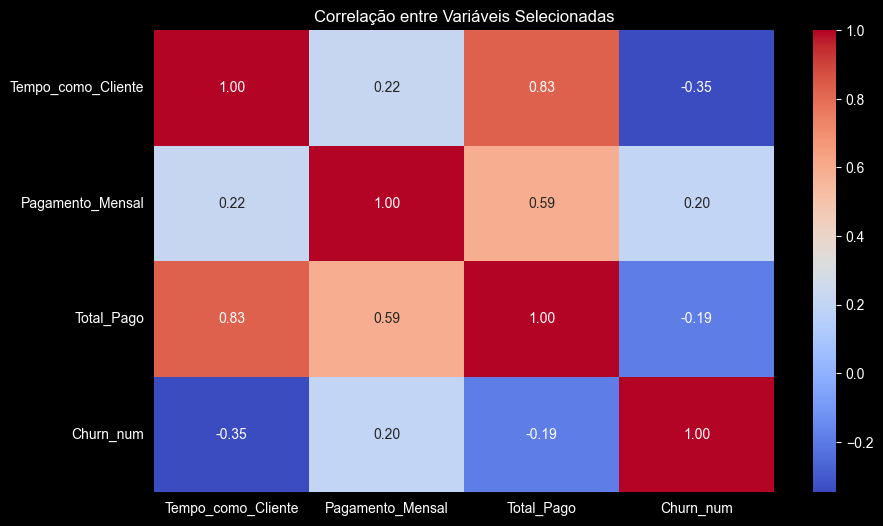

In [30]:
# 1. Criar uma versão numérica do Churn para a correlação fazer sentido
df['Churn_num'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 2. Definir a lista exata de colunas que você quer analisar
colunas_selecionadas = [
    'Tempo_como_Cliente', 
    'Pagamento_Mensal', 
    'Total_Pago', 
    'Churn_num'
]
# 3. Calcular a correlação apenas para essas colunas
corr_matrix = df[colunas_selecionadas].corr()

# 4. Plotar o Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Variáveis Selecionadas')
plt.show()